In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# EDA DATASET CHECKIN

A continuación se procede a extraer la base de datos "Checkin" para verificar su contenido y poder iniciar el exploratorio.

In [3]:
df_checkin = pd.read_json(r'C:\GitHub\Bases\Grupal_Henry\Yelp\Yelp-20250213T170414Z-003\Yelp\checkin.json', lines=True)


In [4]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [5]:
df_checkin.head()

business_id                                               date
0  ---kPU91CF4Lq2-WlRu9Lw  2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020...
1  --0iUa4sNDFiZFrAdIWhZQ  2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011...
2  --30_8IhuyMHbSOcNWd6DQ           2013-06-14 23:29:17, 2014-08-13 23:20:22
3  --7PUidqRWpRSpXebiyxTg  2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012...
4  --7jw19RH9JKXgFohspgQw  2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014...

In [6]:
df_checkin.shape

(131930, 2)

Vemos que el dataset `df_checkin` contiene 131.930 filas y solo dos columnas:  

- **`business_id`**: Identificador único del negocio.  
- **`date`**: Lista de fechas separadas por comas, que representa los registros de visitas al establecimiento o las visualizaciones de su página.  

En el primer caso, este dato podría proporcionar información sobre los horarios en los que el negocio recibe más clientes. 
Para un análisis más detallado, se pueden consultar bases de datos como las de Google.  

## Exploración inicial del DataFrame

In [7]:
 # 1. Tipos de datos
print("\n1. Tipos de datos:")
print(df_checkin.dtypes)
    
    # 2. Valores faltantes
print("\n2. Valores faltantes:")
print(df_checkin.isnull().sum())
    
    # 3. Valores nulos
print("\n3. Valores nulos:")
print(df_checkin.isna().sum())
    
    # 4. Duplicados
print("\n4. Duplicados:")
print(f"Número de filas duplicadas: {df_checkin.duplicated().sum()}")


1. Tipos de datos:
business_id    object
date           object
dtype: object

2. Valores faltantes:
business_id    0
date           0
dtype: int64

3. Valores nulos:
business_id    0
date           0
dtype: int64

4. Duplicados:
Número de filas duplicadas: 0


1. **Tipos de datos:**  
   - Ambas columnas, `business_id` y `date`, tienen tipo de dato `object`.  
   - `business_id` como `object` es correcto si representa identificadores únicos en formato de texto.  
   - `date` debería estar en formato de fecha (`datetime`) para facilitar su manipulación y análisis.  

2. **Valores faltantes y nulos:**  
   - No hay valores faltantes ni nulos en ninguna de las columnas, lo que indica que los datos están completos.  

3. **Duplicados:**  
   - No hay filas duplicadas en el DataFrame, lo que sugiere que cada registro es único.  

### **Paso a seguir:**  
- Convertir la columna `date` a formato `datetime` para facilitar análisis temporales:  
  ```python
  df_checkin['date'] = pd.to_datetime(df_checkin['date'])

## Analisis de visitas o visualizaciones de su pagina. 

In [8]:
# Quiero contar la cantidad de visitas que ha recibido cada negocio, se crea la columna Count_visit
df_checkin['count_visit']= df_checkin['date'].fillna('').apply(lambda x: len(x.split(',')))

In [9]:
df_checkin = df_checkin.sort_values(by='count_visit', ascending=False) # Para ordenar de forma descendente

In [10]:
df_checkin.info()

<class 'pandas.core.frame.DataFrame'>
Index: 131930 entries, 878 to 131929
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
 2   count_visit  131930 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.0+ MB


In [11]:
df_checkin.describe()

count_visit
count  131930.000000
mean      101.242136
std       417.132327
min         1.000000
25%         6.000000
50%        20.000000
75%        72.000000
max     52144.000000

El análisis estadístico de la columna `count_visit` nos proporciona información clave sobre la distribución de las visitas:

- **Cantidad de registros (`count`)**: 131,930 entradas.  
- **Promedio (`mean`)**: 101.24 visitas.  
- **Desviación estándar (`std`)**: 417.13, lo que indica una alta variabilidad en las visitas.  
- **Mínimo (`min`)**: 1 visita.  
- **Cuartiles**:  
  - 25% de los establecimientos tienen **6 o menos** visitas.  
  - 50% (mediana) tienen **20 visitas**.  
  - 75% tienen **72 visitas o menos**.  
- **Máximo (`max`)**: 52,144 visitas, lo que sugiere la presencia de valores atípicos o negocios con un tráfico excepcionalmente alto.  

En general, los datos muestran una distribución sesgada hacia la derecha, con la mayoría de los negocios recibiendo relativamente pocas visitas y algunos casos extremos con una gran cantidad de visitas.


### Extracción de años y meses

In [12]:
df_checkin_per = df_checkin # Creo un espejo para no dañar el original

In [13]:
df_checkin_per.head()

business_id  \
878    -QI8Qi8XWH3D8y8ethnajA   
33681  FEXhWNCMkv22qG04E83Qjg   
32401  Eb1XmmLWyt_way5NNZ7-Pw   
83440  c_4c5rJECZSfNgFj7frwHQ   
11840  4i4kmYm9wgSNyF1b6gKphg   

                                                    date  count_visit  
878    2010-01-17 16:30:46, 2010-01-18 20:17:55, 2010...        52144  
33681  2010-01-16 07:39:02, 2010-01-17 14:04:18, 2010...        40109  
32401  2010-01-21 19:43:12, 2010-02-03 10:17:21, 2010...        37562  
83440  2010-02-06 18:03:00, 2010-02-08 00:06:52, 2010...        37518  
11840  2010-01-21 19:31:34, 2010-01-26 22:12:24, 2010...        31168

Buscamos extraer las fechas en filas y posteriormente los años y meses de cada fecha.

In [14]:
df_checkin_per["date"] = df_checkin_per["date"].str.split(", ") # Para dividir la columna en listas

In [15]:
df_checkin_per = df_checkin_per.explode("date", ignore_index=True) # Para exandir las listas en filas

In [16]:
df_checkin_per = df_checkin_per.drop(columns=['count_visit']) # Sobraria la columna "count_visit", la elimino
df_checkin_per.head() # Para confirmar que la columna "date" quedó desanidada. 

business_id                 date
0  -QI8Qi8XWH3D8y8ethnajA  2010-01-17 16:30:46
1  -QI8Qi8XWH3D8y8ethnajA  2010-01-18 20:17:55
2  -QI8Qi8XWH3D8y8ethnajA  2010-01-20 16:10:19
3  -QI8Qi8XWH3D8y8ethnajA  2010-01-21 21:03:09
4  -QI8Qi8XWH3D8y8ethnajA  2010-01-26 11:08:23

In [17]:
df_checkin_per["date"] = pd.to_datetime(df_checkin_per["date"], format="%Y-%m-%d %H:%M:%S", errors="coerce") # Para que date sea datetime

In [18]:
# Para extraer año y mes
df_checkin_per["year"] = df_checkin_per["date"].dt.year
df_checkin_per["month"] = df_checkin_per["date"].dt.month

In [19]:
df_checkin_per.head(20) # Para observar los resultados.

business_id                date  year  month
0   -QI8Qi8XWH3D8y8ethnajA 2010-01-17 16:30:46  2010      1
1   -QI8Qi8XWH3D8y8ethnajA 2010-01-18 20:17:55  2010      1
2   -QI8Qi8XWH3D8y8ethnajA 2010-01-20 16:10:19  2010      1
3   -QI8Qi8XWH3D8y8ethnajA 2010-01-21 21:03:09  2010      1
4   -QI8Qi8XWH3D8y8ethnajA 2010-01-26 11:08:23  2010      1
5   -QI8Qi8XWH3D8y8ethnajA 2010-01-26 20:28:08  2010      1
6   -QI8Qi8XWH3D8y8ethnajA 2010-01-28 22:23:29  2010      1
7   -QI8Qi8XWH3D8y8ethnajA 2010-01-30 11:44:54  2010      1
8   -QI8Qi8XWH3D8y8ethnajA 2010-01-31 10:53:24  2010      1
9   -QI8Qi8XWH3D8y8ethnajA 2010-01-31 21:50:16  2010      1
10  -QI8Qi8XWH3D8y8ethnajA 2010-02-02 16:04:33  2010      2
11  -QI8Qi8XWH3D8y8ethnajA 2010-02-04 22:20:04  2010      2
12  -QI8Qi8XWH3D8y8ethnajA 2010-02-05 02:46:35  2010      2
13  -QI8Qi8XWH3D8y8ethnajA 2010-02-07 22:22:18  2010      2
14  -QI8Qi8XWH3D8y8ethnajA 2010-02-08 02:21:08  2010      2
15  -QI8Qi8XWH3D8y8ethnajA 2010-02-12 00:07:58  2010      2
16  -QI8Qi8XWH3D8y8ethnajA 2010-02-13 17:03:16  2010      2
17  -QI8Qi8XWH3D8y8ethnajA 2010-02-13 21:25:48  2010      2
18  -QI8Qi8XWH3D8y8ethnajA 2010-02-18 15:41:53  2010      2
19  -QI8Qi8XWH3D8y8ethnajA 2010-02-19 10:46:05  2010      2

In [20]:
df_checkin_permonth = df_checkin_per.groupby(["year", "month", "business_id",]).size().reset_index(name="count") # Se crea un dataset con los valores agrupados por año y por mes

In [35]:
df_checkin_permonth.head()

year month             business_id  count     date
0  2009    12  jm_6bIhR_TuciFIk5rhR7g      1  2009-12
1  2009    12  yEKmlxvhA2EWrMLbwWi7Hw      1  2009-12
2  2010     1  -3IOd5YntpkbK6RwT3HYtA      1  2010-01
3  2010     1  -5Rah4ZvWsDu4oilUZxhtw      1  2010-01
4  2010     1  -KWel73upKHxstRCr9JGLw      2  2010-01

In [22]:
# Convertir las columnas 'año' y 'mes' a tipo objeto (str)
df_checkin_permonth['year'] = df_checkin_permonth['year'].astype(str)
df_checkin_permonth['month'] = df_checkin_permonth['month'].astype(str)



In [23]:
df_checkin_permonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495410 entries, 0 to 3495409
Data columns (total 4 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   year         object
 1   month        object
 2   business_id  object
 3   count        int64 
dtypes: int64(1), object(3)
memory usage: 106.7+ MB


### Analisis: Cantidad de Visitas por Mes y Año

In [30]:
df_checkin_permonth.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3495410 entries, 0 to 3495409
Data columns (total 5 columns):
 #   Column       Dtype 
---  ------       ----- 
 0   year         object
 1   month        object
 2   business_id  object
 3   count        int64 
 4   date         object
dtypes: int64(1), object(4)
memory usage: 133.3+ MB


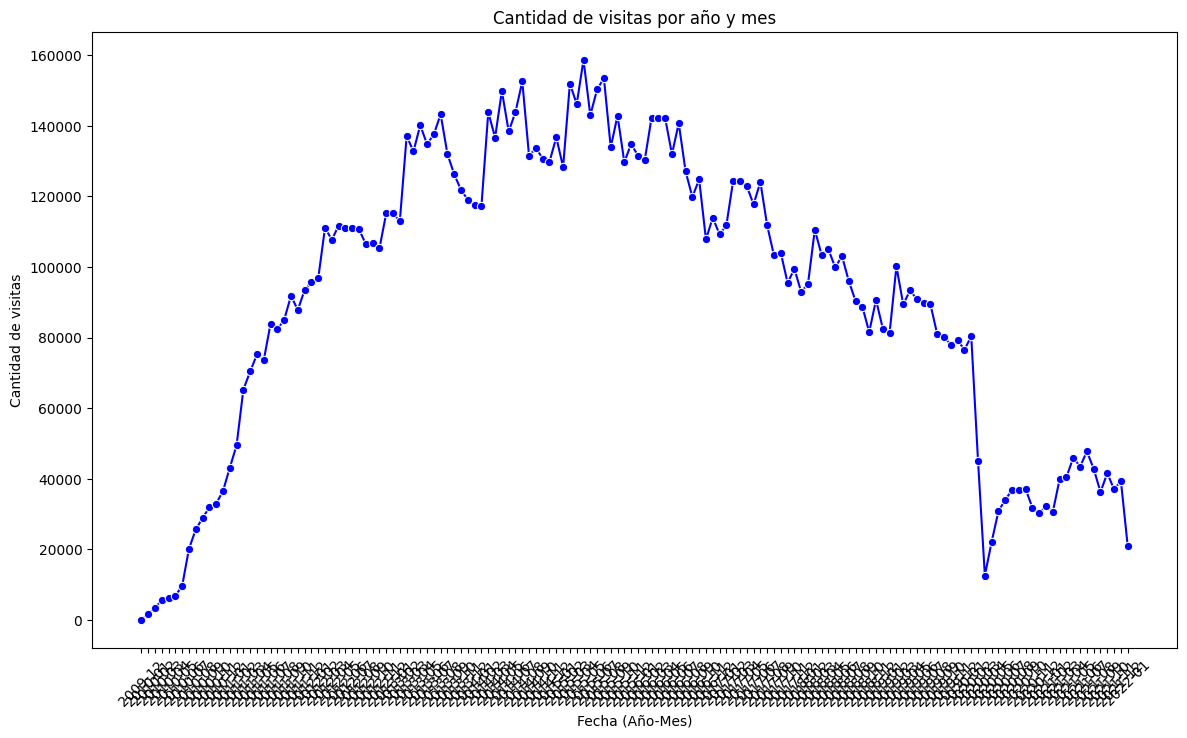

In [24]:
# Convertir 'year' y 'month' en un solo formato de fecha para mejor visualización
df_checkin_permonth['date'] = df_checkin_permonth['year'] + '-' + df_checkin_permonth['month'].str.zfill(2)

# Agrupar por fecha y sumar las visitas
df_monthly = df_checkin_permonth.groupby('date')['count'].sum().reset_index()

plt.figure(figsize=(14, 8))
sns.lineplot(x='date', y='count', data=df_monthly, marker='o', color='b')
plt.title('Cantidad de visitas por año y mes')
plt.xlabel('Fecha (Año-Mes)')
plt.ylabel('Cantidad de visitas')
plt.xticks(rotation=45)

plt.show()

La gráfica muestra la cantidad de visitas a lo largo del tiempo, agrupadas por mes y año. Se observa una tendencia de crecimiento inicial en el número de visitas, alcanzando un pico máximo, seguido de una disminución progresiva. Esto podría indicar una fase de expansión y posterior reducción en la actividad o popularidad del servicio.  

Sin embargo, la visualización con esta granularidad hace que la lectura sea difícil debido a la cantidad de etiquetas en el eje X. Por el momento, solo dejaremos la gráfica agrupada por año en lugar de por mes y añ

### Analisis: Cantidad de Visitas por Año

C:\Users\anavi\AppData\Local\Temp\ipykernel_25972\1558453895.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='year', y='count', data=df_yearly, palette='Blues')


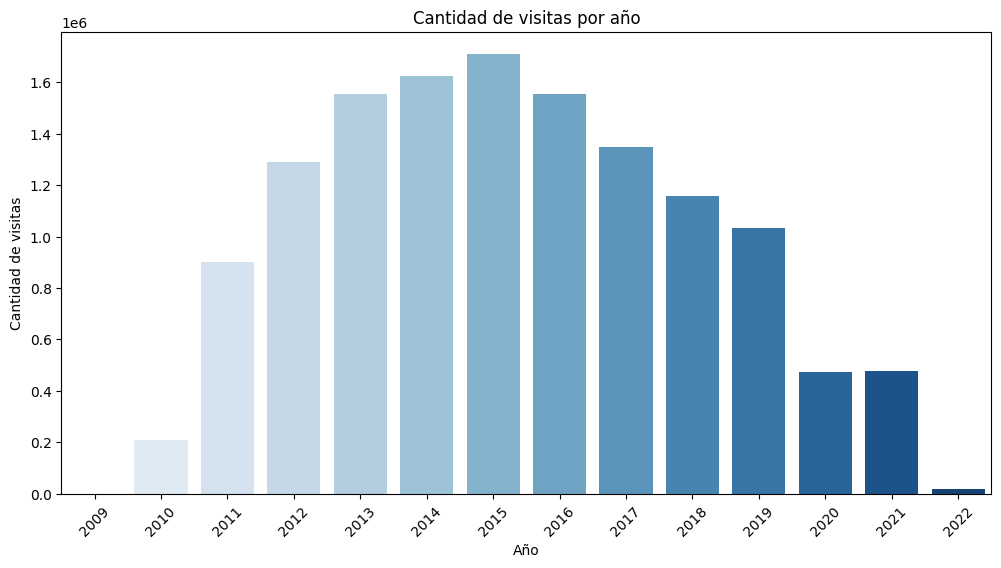

In [31]:
# Agrupar por año y sumar la cantidad de visitas
df_yearly = df_checkin_permonth.groupby('year')['count'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='count', data=df_yearly, palette='Blues')
plt.title('Cantidad de visitas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de visitas')
plt.xticks(rotation=45)

plt.show()


La gráfica muestra la evolución de la cantidad de visitas a lo largo de los años. Se observa un aumento progresivo en las visitas hasta alcanzar un punto máximo en 2015. A partir de ese año, comienza una disminución gradual.  

Algunos puntos clave:
- **Crecimiento inicial:** Desde 2010 hasta 2015, las visitas aumentan de manera constante, lo que sugiere una mayor popularidad del negocio o plataforma en ese período.
- **Pico en 2015:** Se registra el mayor número de visitas en este año.
- **Descenso progresivo:** A partir de 2016, las visitas comienzan a disminuir, con una caída más pronunciada a partir de 2019.
- **Caída significativa en 2020:** Posiblemente relacionada con eventos externos que afectaron la actividad (como la pandemia de COVID-19).

En general, la gráfica refleja el auge y la disminución de visitas a lo largo del tiempo, lo que podría estar influenciado por diversos factores, como cambios en la demanda, competencia o condiciones externas.

# ETL: Categoría hoteles, restaurantes y turismo. 

En este momento se procede a limpiar la base de datos para segmentarla y usar únicamente los establecimientos que tienen relación con la categoría **"hoteles, restaurantes y turismo"**, la cual ya habíamos extraído cuando se hizo la limpieza del dataset *Business*.

In [32]:
df_cat = pd.read_csv(r'C:\Users\anavi\OneDrive\Escritorio\Grupal\Proyecto_Final\ELT\etl_categories.csv') # Para extraer la categorización. 

In [33]:
df_cat.head()

business_id               category       subcategory
0  Pns2l4eNsfO8kk83dixA6A                Doctors  Other categories
1  Pns2l4eNsfO8kk83dixA6A  Naturopathic/Holistic  Other categories
2  Pns2l4eNsfO8kk83dixA6A            Acupuncture  Other categories
3  Pns2l4eNsfO8kk83dixA6A          Nutritionists  Other categories
4  mpf3x-BjTdTEA3yCZrAYPw               Notaries  Other categories

In [36]:
df_checkin_cat= df_checkin_permonth # Creo un nuevo dataset

In [37]:
df_checkin_cat.head() # Para visualizarlo 

year month             business_id  count     date
0  2009    12  jm_6bIhR_TuciFIk5rhR7g      1  2009-12
1  2009    12  yEKmlxvhA2EWrMLbwWi7Hw      1  2009-12
2  2010     1  -3IOd5YntpkbK6RwT3HYtA      1  2010-01
3  2010     1  -5Rah4ZvWsDu4oilUZxhtw      1  2010-01
4  2010     1  -KWel73upKHxstRCr9JGLw      2  2010-01

In [38]:
df_checkin_cat = df_checkin_cat.merge(df_cat[['business_id', 'subcategory']], on='business_id', how='left') # Creo la columna Categories para filtrarla

In [39]:
df_checkin_cat.head() # Visualizar el dataset creado

year month             business_id  count     date  \
0  2009    12  jm_6bIhR_TuciFIk5rhR7g      1  2009-12   
1  2009    12  jm_6bIhR_TuciFIk5rhR7g      1  2009-12   
2  2009    12  yEKmlxvhA2EWrMLbwWi7Hw      1  2009-12   
3  2009    12  yEKmlxvhA2EWrMLbwWi7Hw      1  2009-12   
4  2010     1  -3IOd5YntpkbK6RwT3HYtA      1  2010-01   

                       subcategory  
0  Hotels, restaurants and tourism  
1  Hotels, restaurants and tourism  
2  Hotels, restaurants and tourism  
3                 Other categories  
4  Hotels, restaurants and tourism

In [40]:
df_filtered = df_checkin_cat[df_checkin_cat['subcategory'] == 'Hotels, restaurants and tourism'] # Filtro solo restaurantes

In [41]:
df_filtered

year month             business_id  count     date  \
0         2009    12  jm_6bIhR_TuciFIk5rhR7g      1  2009-12   
1         2009    12  jm_6bIhR_TuciFIk5rhR7g      1  2009-12   
2         2009    12  yEKmlxvhA2EWrMLbwWi7Hw      1  2009-12   
4         2010     1  -3IOd5YntpkbK6RwT3HYtA      1  2010-01   
5         2010     1  -3IOd5YntpkbK6RwT3HYtA      1  2010-01   
...        ...   ...                     ...    ...      ...   
10037694  2022     1  zymvTQ12tRy3bzmP4tPgOg      1  2022-01   
10037695  2022     1  zymvTQ12tRy3bzmP4tPgOg      1  2022-01   
10037696  2022     1  zymvTQ12tRy3bzmP4tPgOg      1  2022-01   
10037697  2022     1  zymvTQ12tRy3bzmP4tPgOg      1  2022-01   
10037698  2022     1  zymvTQ12tRy3bzmP4tPgOg      1  2022-01   

                              subcategory  
0         Hotels, restaurants and tourism  
1         Hotels, restaurants and tourism  
2         Hotels, restaurants and tourism  
4         Hotels, restaurants and tourism  
5         Hotels, restaurants and tourism  
...                                   ...  
10037694  Hotels, restaurants and tourism  
10037695  Hotels, restaurants and tourism  
10037696  Hotels, restaurants and tourism  
10037697  Hotels, restaurants and tourism  
10037698  Hotels, restaurants and tourism  

[6996436 rows x 6 columns]

In [42]:
df_filtered.to_csv(r'C:\Users\anavi\OneDrive\Escritorio\Grupal\Proyecto_Final\ELT\etl_checkin.csv', index=False, encoding='utf-8')